In [1]:
!python --version

Python 3.9.2


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [17]:
conn = sqlite3.connect("../../streamdb.db")

In [18]:
c = conn.cursor()

# Read Lapdata and determine sessionTime of each new Lap

In [19]:
session_name = 'russia_100_race_offline'

In [20]:
sql = f"""SELECT * FROM {session_name}_lapdata"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(475,
  0.11927448958158493,
  0.0,
  0.0,
  58.77036666870117,
  58.77036666870117,
  20,
  1)]

In [21]:
lapdata = pd.DataFrame(data, columns =['id', 'sessionTime', 'lastLapTime', 'currentLapTime', 'lapDistance', 'totalDistance', 'carPosition', 'currentLapNum'])
lapdata.head()

id  sessionTime  lastLapTime  currentLapTime  lapDistance  totalDistance  \
0  475     0.119274          0.0             0.0    58.770367      58.770367   
1  476     0.220079          0.0             0.0    58.770367      58.770367   
2  477     0.411526          0.0             0.0    58.770367      58.770367   
3  478     2.368863          0.0             0.0    58.770367      58.770367   
4  479     2.769275          0.0             0.0    58.770367      58.770367   

   carPosition  currentLapNum  
0           20              1  
1           20              1  
2           20              1  
3           20              1  
4           20              1

In [22]:
laptimes = lapdata['lastLapTime'].unique()
last_lap = lapdata[lapdata['currentLapNum'] == len(laptimes)]['currentLapTime'].max()
laptimes = np.append(laptimes, last_lap)
laptimes

array([  0.        , 107.34108734,  99.56604767,  99.4185791 ,
        99.55978394,  98.83074951,  98.46392822,  99.37280273,
       100.17974854,  98.95373535,  99.66436768,  98.12268066,
        98.71948242,  98.67102051,  98.21508789,  98.66943359,
        98.39648438,  98.79553223,  98.4119873 ,  98.8482666 ,
        98.59985352, 102.34802246, 117.66235352,  96.6875    ,
        96.81396484,  96.77685547,  95.67089844,  96.67749023,
        96.56640625,  95.71313477,  96.21069336,  96.81176758,
        96.09057617,  96.94873047,  97.16943359,  96.19140625,
        97.09814453, 100.18310547, 116.04052734,  95.41308594,
        95.14624023,  95.60668945,  94.67700195,  94.95556641,
        95.13574219,  95.38330078,  95.2890625 ,  95.76416016,
        94.77001953,  95.97412109,  95.60107422,  96.38232422,
        96.06884766,  96.2793045 ])

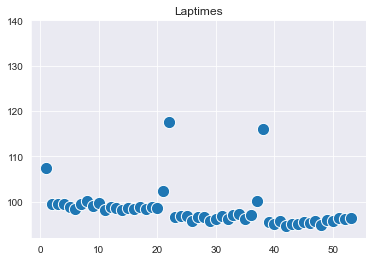

In [23]:
sns.scatterplot(x=range(1, len(laptimes)), y=laptimes[1:], s=150)
plt.ylim(92, 140)
plt.title("Laptimes");
plt.savefig("laptimes.png")

Best Laptime: 94.677001953125
Median: 97.0234375
Mean: 98.2813251201923
Standard Deviation: 4.316005257589727
Slowest Laptime: 117.662353515625


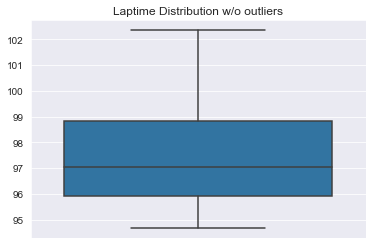

In [24]:
unique_laptimes = lapdata[lapdata['lastLapTime'] > 0]['lastLapTime'].unique()
print("Best Laptime:", np.min(unique_laptimes))
print("Median:", np.median(unique_laptimes))
print("Mean:", np.mean(unique_laptimes))
print("Standard Deviation:", np.std(unique_laptimes))
print("Slowest Laptime:", np.max(unique_laptimes))
sns.boxplot(y=unique_laptimes, showfliers = False)
plt.title("Laptime Distribution w/o outliers")
plt.draw()
plt.savefig("laptimes_boxplot.png")

In [25]:
for i, timing in enumerate(lapdata['lastLapTime'].unique()):
    print(i, timing)

0 0.0
1 107.3410873413086
2 99.56604766845703
3 99.4185791015625
4 99.55978393554688
5 98.83074951171875
6 98.46392822265625
7 99.372802734375
8 100.17974853515625
9 98.9537353515625
10 99.66436767578125
11 98.1226806640625
12 98.719482421875
13 98.6710205078125
14 98.215087890625
15 98.66943359375
16 98.396484375
17 98.7955322265625
18 98.4119873046875
19 98.8482666015625
20 98.599853515625
21 102.3480224609375
22 117.662353515625
23 96.6875
24 96.81396484375
25 96.77685546875
26 95.6708984375
27 96.677490234375
28 96.56640625
29 95.713134765625
30 96.210693359375
31 96.811767578125
32 96.090576171875
33 96.94873046875
34 97.16943359375
35 96.19140625
36 97.09814453125
37 100.18310546875
38 116.04052734375
39 95.4130859375
40 95.146240234375
41 95.606689453125
42 94.677001953125
43 94.95556640625
44 95.1357421875
45 95.38330078125
46 95.2890625
47 95.76416015625
48 94.77001953125
49 95.97412109375
50 95.60107421875
51 96.38232421875
52 96.06884765625


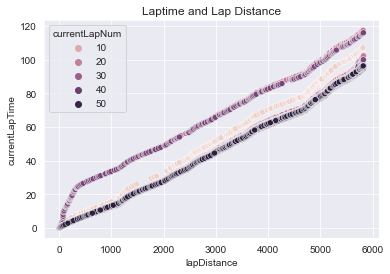

In [26]:
sns.scatterplot(x='lapDistance', y='currentLapTime', hue='currentLapNum', data=lapdata)
plt.title("Laptime and Lap Distance");
plt.savefig("laptimes_lapdistance.png")

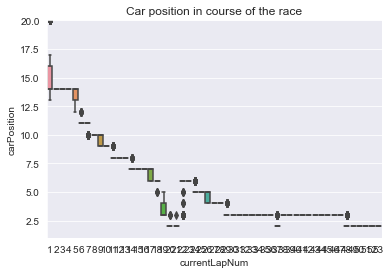

In [27]:
sns.boxplot(x='currentLapNum', y='carPosition', data=lapdata)
plt.ylim(1,20)
plt.title("Car position in course of the race");
plt.savefig("positions.png")

In [28]:
# Determine the sessiontime at every end of a lap
upper_boundaries = [0]
for lap in lapdata['currentLapNum'].unique():
    upper_boundary = lapdata[lapdata['currentLapNum'] == lap]['sessionTime'].max()
    upper_boundaries.append(upper_boundary)
upper_boundaries[:5]

[0,
 113.80523681640625,
 213.08006286621094,
 312.9724426269531,
 412.08172607421875]

# Telemetry Data

In [29]:
sql = f"""SELECT * FROM {session_name}_telemetry"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(439,
  0.27434042096138,
  0,
  0.0,
  0.013489918783307076,
  0.0,
  0,
  3501.0,
  0,
  29.0,
  29.0,
  29.0,
  29.0,
  84.0,
  84.0,
  89.0,
  89.0,
  84.0,
  84.0,
  89.0,
  89.0,
  88.0)]

In [30]:
column_names = [description[0] for description in c.description]
column_names[:5]

['id', 'sessionTime', 'speed', 'throttle', 'steer']

In [31]:
telemetry = pd.DataFrame(data, columns =column_names)
telemetry.head()

id  sessionTime  speed  throttle    steer  brake  gear  engineRPM  drs  \
0  439     0.274340      0  0.000000  0.01349    0.0     0     3501.0    0   
1  440     0.567327      0  0.000000  0.01349    0.0     0     3495.0    0   
2  441     1.968622      0  0.218067  0.01349    0.0     0     6380.0    0   
3  442     2.552410      0  0.266667  0.01349    0.0     0    10535.0    0   
4  443     2.986082      0  0.196078  0.01349    0.0     0    12985.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  29.0                  29.0                  29.0   
1                  29.0                  29.0                  29.0   
2                  29.0                  29.0                  29.0   
3                  29.0                  29.0                  29.0   
4                  29.0                  29.0                  29.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  29.0                        84.0   
1                  29.0                        83.0   
2                  29.0                        81.0   
3                  29.0                        81.0   
4                  29.0                        80.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        84.0                        89.0   
1                        83.0                        88.0   
2                        81.0                        87.0   
3                        81.0                        86.0   
4                        80.0                        86.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        89.0                      84.0   
1                        88.0                      84.0   
2                        87.0                      84.0   
3                        86.0                      84.0   
4                        86.0                      84.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      84.0                      89.0   
1                      84.0                      89.0   
2                      84.0                      89.0   
3                      84.0                      89.0   
4                      84.0                      89.0   

   tyresInnerTemperature_FR  engineTemperature  
0                      89.0               88.0  
1                      89.0               88.0  
2                      89.0               88.0  
3                      89.0               89.0  
4                      89.0               89.0

In [32]:
intervals = []
for i in range(1, len(upper_boundaries)):
    tup = (upper_boundaries[i-1], upper_boundaries[i])
    intervals.append(tup)
intervals

[(0, 113.80523681640625),
 (113.80523681640625, 213.08006286621094),
 (213.08006286621094, 312.9724426269531),
 (312.9724426269531, 412.08172607421875),
 (412.08172607421875, 511.3736572265625),
 (511.3736572265625, 609.2977905273438),
 (609.2977905273438, 709.1557006835938),
 (709.1557006835938, 809.249267578125),
 (809.249267578125, 908.1578979492188),
 (908.1578979492188, 1007.9483642578125),
 (1007.9483642578125, 1105.7437744140625),
 (1105.7437744140625, 1204.8931884765625),
 (1204.8931884765625, 1302.8421630859375),
 (1302.8421630859375, 1401.610107421875),
 (1401.610107421875, 1500.51025390625),
 (1500.51025390625, 1598.9056396484375),
 (1598.9056396484375, 1697.523193359375),
 (1697.523193359375, 1794.2362060546875),
 (1794.2362060546875, 1894.9537353515625),
 (1894.9537353515625, 1991.26416015625),
 (1991.26416015625, 2095.8359375),
 (2095.8359375, 2213.249755859375),
 (2213.249755859375, 2309.85302734375),
 (2309.85302734375, 2406.5400390625),
 (2406.5400390625, 2502.49145507

In [33]:
bins = pd.IntervalIndex.from_tuples(intervals)
laps_intervals = pd.cut(telemetry['sessionTime'], bins)

In [34]:
telemetry['interval'] = laps_intervals
telemetry.head()

id  sessionTime  speed  throttle    steer  brake  gear  engineRPM  drs  \
0  439     0.274340      0  0.000000  0.01349    0.0     0     3501.0    0   
1  440     0.567327      0  0.000000  0.01349    0.0     0     3495.0    0   
2  441     1.968622      0  0.218067  0.01349    0.0     0     6380.0    0   
3  442     2.552410      0  0.266667  0.01349    0.0     0    10535.0    0   
4  443     2.986082      0  0.196078  0.01349    0.0     0    12985.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  29.0                  29.0                  29.0   
1                  29.0                  29.0                  29.0   
2                  29.0                  29.0                  29.0   
3                  29.0                  29.0                  29.0   
4                  29.0                  29.0                  29.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  29.0                        84.0   
1                  29.0                        83.0   
2                  29.0                        81.0   
3                  29.0                        81.0   
4                  29.0                        80.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        84.0                        89.0   
1                        83.0                        88.0   
2                        81.0                        87.0   
3                        81.0                        86.0   
4                        80.0                        86.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        89.0                      84.0   
1                        88.0                      84.0   
2                        87.0                      84.0   
3                        86.0                      84.0   
4                        86.0                      84.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      84.0                      89.0   
1                      84.0                      89.0   
2                      84.0                      89.0   
3                      84.0                      89.0   
4                      84.0                      89.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  
0                      89.0               88.0  (0.0, 113.80523681640625]  
1                      89.0               88.0  (0.0, 113.80523681640625]  
2                      89.0               88.0  (0.0, 113.80523681640625]  
3                      89.0               89.0  (0.0, 113.80523681640625]  
4                      89.0               89.0  (0.0, 113.80523681640625]

In [35]:
telemetry.isnull().sum()[telemetry.isnull().sum() > 0]

interval    2
dtype: int64

In [36]:
telemetry.dropna(subset=['interval'], axis=0, inplace=True)

In [37]:
lapnum = []
for i in range(0, len(telemetry)):
    value = telemetry.iloc[i].interval
    tup = eval(str(value).replace(']', ")"))
    lapn = intervals.index(tup) + 1
    lapnum.append(lapn)

lapnum[:5]

[1, 1, 1, 1, 1]

In [38]:
telemetry['lapNum'] = lapnum
telemetry.head()

id  sessionTime  speed  throttle    steer  brake  gear  engineRPM  drs  \
0  439     0.274340      0  0.000000  0.01349    0.0     0     3501.0    0   
1  440     0.567327      0  0.000000  0.01349    0.0     0     3495.0    0   
2  441     1.968622      0  0.218067  0.01349    0.0     0     6380.0    0   
3  442     2.552410      0  0.266667  0.01349    0.0     0    10535.0    0   
4  443     2.986082      0  0.196078  0.01349    0.0     0    12985.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  29.0                  29.0                  29.0   
1                  29.0                  29.0                  29.0   
2                  29.0                  29.0                  29.0   
3                  29.0                  29.0                  29.0   
4                  29.0                  29.0                  29.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  29.0                        84.0   
1                  29.0                        83.0   
2                  29.0                        81.0   
3                  29.0                        81.0   
4                  29.0                        80.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        84.0                        89.0   
1                        83.0                        88.0   
2                        81.0                        87.0   
3                        81.0                        86.0   
4                        80.0                        86.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        89.0                      84.0   
1                        88.0                      84.0   
2                        87.0                      84.0   
3                        86.0                      84.0   
4                        86.0                      84.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      84.0                      89.0   
1                      84.0                      89.0   
2                      84.0                      89.0   
3                      84.0                      89.0   
4                      84.0                      89.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  \
0                      89.0               88.0  (0.0, 113.80523681640625]   
1                      89.0               88.0  (0.0, 113.80523681640625]   
2                      89.0               88.0  (0.0, 113.80523681640625]   
3                      89.0               89.0  (0.0, 113.80523681640625]   
4                      89.0               89.0  (0.0, 113.80523681640625]   

   lapNum  
0       1  
1       1  
2       1  
3       1  
4       1

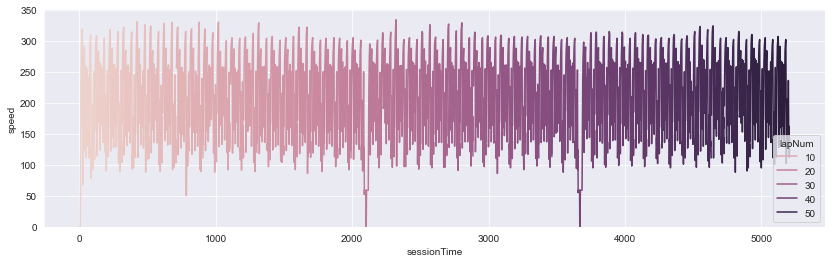

In [39]:
plt.figure(figsize=(14,4))
sns.lineplot(x=telemetry['sessionTime'], y=telemetry['speed'], hue=telemetry['lapNum'])
plt.ylim(0,);

In [40]:
for j, i in enumerate(intervals):
    print(f"Lap {j+1}: {i[0]}")

Lap 1: 0
Lap 2: 113.80523681640625
Lap 3: 213.08006286621094
Lap 4: 312.9724426269531
Lap 5: 412.08172607421875
Lap 6: 511.3736572265625
Lap 7: 609.2977905273438
Lap 8: 709.1557006835938
Lap 9: 809.249267578125
Lap 10: 908.1578979492188
Lap 11: 1007.9483642578125
Lap 12: 1105.7437744140625
Lap 13: 1204.8931884765625
Lap 14: 1302.8421630859375
Lap 15: 1401.610107421875
Lap 16: 1500.51025390625
Lap 17: 1598.9056396484375
Lap 18: 1697.523193359375
Lap 19: 1794.2362060546875
Lap 20: 1894.9537353515625
Lap 21: 1991.26416015625
Lap 22: 2095.8359375
Lap 23: 2213.249755859375
Lap 24: 2309.85302734375
Lap 25: 2406.5400390625
Lap 26: 2502.491455078125
Lap 27: 2598.387451171875
Lap 28: 2694.9384765625
Lap 29: 2791.461669921875
Lap 30: 2886.634033203125
Lap 31: 2983.228515625
Lap 32: 3080.22265625
Lap 33: 3176.114501953125
Lap 34: 3273.055419921875
Lap 35: 3369.10107421875
Lap 36: 3464.638916015625
Lap 37: 3562.790771484375
Lap 38: 3663.0703125
Lap 39: 3779.1669921875
Lap 40: 3874.4140625
Lap 41: 

# Compare two laps

In [41]:
lap1 = 9
lap2 = 20
excerpt1 = telemetry[telemetry['lapNum'] == lap1].copy()
excerpt2 = telemetry[telemetry['lapNum'] == lap2].copy()
excerpt1['normalizedTime'] = excerpt1['sessionTime'] - intervals[lap1-1][0]
excerpt2['normalizedTime'] = excerpt2['sessionTime'] - intervals[lap2-1][0]

In [42]:
compare_df = excerpt1.append(excerpt2)

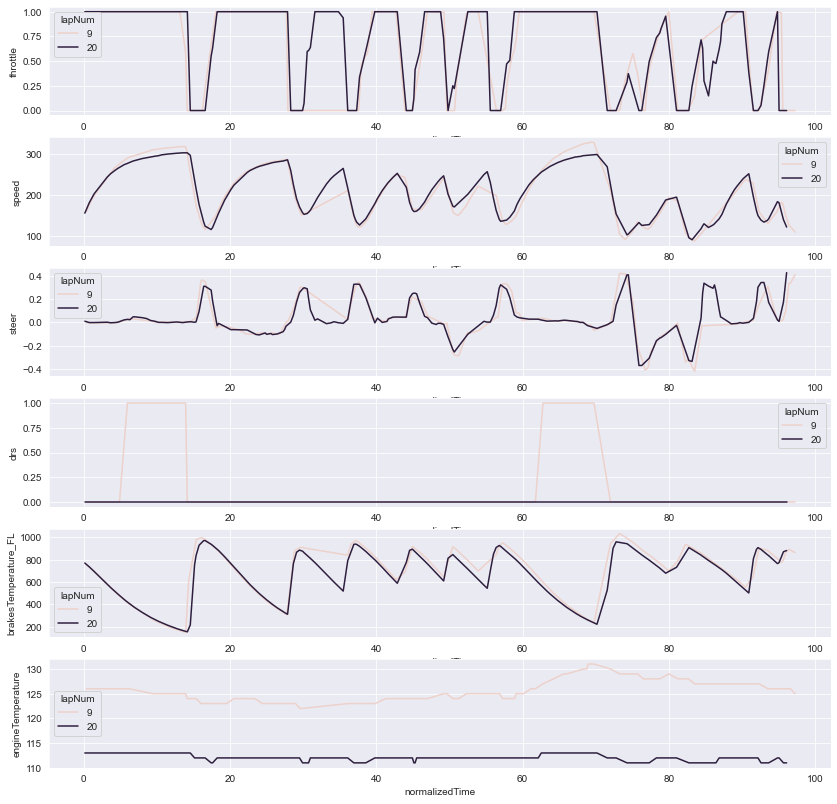

In [43]:
plt.figure(figsize=(14,14))
plt.subplot(6,1,1)
sns.lineplot(x='normalizedTime', y='throttle', hue='lapNum', data=compare_df)
plt.subplot(6,1,2)
sns.lineplot(x='normalizedTime', y='speed', hue='lapNum', data=compare_df)
plt.subplot(6,1,3)
sns.lineplot(x='normalizedTime', y='steer', hue='lapNum', data=compare_df)
plt.subplot(6,1,4)
sns.lineplot(x='normalizedTime', y='drs', hue='lapNum', data=compare_df)
plt.subplot(6,1,5)
sns.lineplot(x='normalizedTime', y='brakesTemperature_FL', hue='lapNum', data=compare_df)
plt.subplot(6,1,6)
sns.lineplot(x='normalizedTime', y='engineTemperature', hue='lapNum', data=compare_df);
plt.savefig("telemetry_analysis.png")

In [27]:
conn.close()